# RDF2Vec Light / KGVec2go Service

## Simple Example: Dimensions = 2

{'http://dbpedia.org/resource/Berlin': [-2.3022118, 2.313703], 'http://dbpedia.org/resource/France': [-1.7952856, 2.0264292], 'http://dbpedia.org/resource/Germany': [-1.9374659, 2.2014349], 'http://dbpedia.org/resource/Paris': [-2.7881863, 3.4134037]}


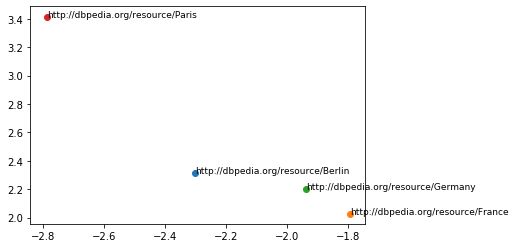

In [272]:
import requests
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display, HTML


# get the vectors (train on the spot)
data = ["http://dbpedia.org/resource/Germany", "http://dbpedia.org/resource/Berlin", 
       "http://dbpedia.org/resource/France", "http://dbpedia.org/resource/Paris"]
data = {'entities' : str(data)}
r = requests.get('http://localhost:5000/rest/rdf2vec-light/dbpedia/250/cbow/2', headers=data) 
result = ast.literal_eval(r.text)

print(result)

# transform to data frame
frame = pd.DataFrame.from_dict(result)

#visualize
for i, label in enumerate(frame.columns):
    x = frame.T.iloc[i][0]
    y = frame.T.iloc[i][1]
    plt.scatter(x, y)
    plt.text(x , y, label, fontsize = 9)
plt.show()

## Simple Example: Dimensions = 100 and PCA

<Response [200]>
{'http://dbpedia.org/resource/Batman_Forever': [-0.12606855, -0.083717205, -0.12991157, 0.055997737, 0.06777205, -0.27647507, 0.55551213, 0.3366872, -0.21515194, 0.2547709, 0.03860524, 0.3896665, -0.474443, 0.0032250718, -0.2804554, -0.05326241, -0.23724085, 0.52076393, -0.21810555, 0.20385408, 0.46467257, -0.4068413, -0.37331238, -0.16372818, 0.6381023, -0.70357025, -0.5339266, 0.8157648, 0.27202705, 0.06953067, 0.13093276, -0.18882439, 0.049700066, -0.060848292, -0.1598181, -0.28998142, -0.26609012, 0.20877793, 0.12838088, -0.0015844445, -0.32362473, 0.12618664, -0.083822, -0.39929596, 0.006863841, -0.46006024, -0.17092046, -0.10854649, -0.028208978, -0.20049354, 0.1670915, -0.21490172, -0.26201263, -0.38501182, -0.16777664, 0.11164768, 0.3235741, -0.021287756, -0.4211934, 0.20449932, -0.12425712, -0.26130942, 0.21674968, 0.20856659, -0.18155067, 0.25316635, 0.24107696, 0.1422258, -0.27069253, -0.1743914, 0.36500102, -0.100285985, -0.28815284, 0.084214024, 0.280953, 

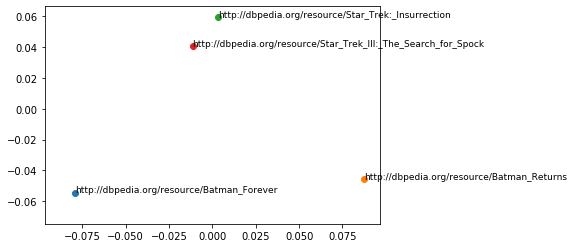

In [271]:
import requests
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display, HTML

# get the vectors (train on the spot)
data = ["http://dbpedia.org/resource/Star_Trek_III:_The_Search_for_Spock", "http://dbpedia.org/resource/Star_Trek:_Insurrection", 
       "http://dbpedia.org/resource/Batman_Forever", "http://dbpedia.org/resource/Batman_Returns"]
data = {'entities' : str(data)}
r = requests.get('http://localhost:5000/rest/rdf2vec-light/dbpedia/250/cbow/100', headers=data) 
print(r)
result = ast.literal_eval(r.text)
print(result)

# transform to data frame
frame = pd.DataFrame.from_dict(result)

# scale
x = frame.values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
normalized_frame = pd.DataFrame(x_scaled)

# perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_frame.T)

# plot
fig, ax = plt.subplots()
for i, label in enumerate(frame.columns):
    x = pca_result[i,0]
    y = pca_result[i,1]
    plt.scatter(x, y)
    plt.text(x , y, label, fontsize = 9)
plt.show()
